# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [101]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sm
import math
from mpl_toolkits.mplot3d import Axes3D
import itertools
import matplotlib as mpl

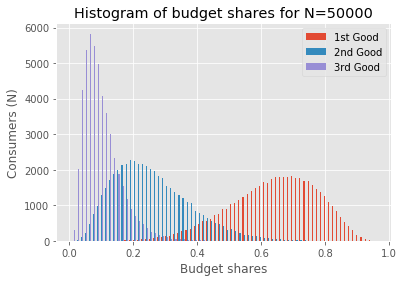

In [103]:
# We plot the histogram
plt.hist(betas, bins=75, label = ['1st Good', '2nd Good', '3rd Good'])
plt.ylabel('Consumers (N)')
plt.xlabel('Budget shares')
plt.title('Histogram of budget shares for N=50000')
plt.legend()
plt.show()

Above we see the plotted histogram of budget shares for the 3 different goods across agents.

Consider the **excess demand functions:**
$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

In [104]:
# We define the 3 demand functions

# Good 1
def demand_good1_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,0]*I/p1

# Good 2
def demand_good2_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,1]*I/p2

# Good 3
def demand_good3_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,2]*I

In [105]:
# Defining the excess demand functions

# Excess demand function 1
def excess1_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_1 = np.sum(demand_good1_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_1 = np.sum(e1)
    
    # excess demand
    excess_demand_1 = demand_1 - supply_1
    
    return excess_demand_1

# Excess demand function 2
def excess2_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_2 = np.sum(demand_good2_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_2 = np.sum(e2)
    
    # excess demand
    excess_demand_2 = demand_2 - supply_2
    
    return excess_demand_2

# Excess demand function 3
def excess3_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_3 = np.sum(demand_good3_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_3 = np.sum(e1)
    
    # excess demand
    excess_demand_3 = demand_3 - supply_3
    
    return excess_demand_3


In [106]:
# Defining the limits
size = 75

linspace_p1 = np.linspace(1, 10, size)
linspace_p2 = np.linspace(1, 10, size)

grid1_empty = np.empty((size,size))
grid2_empty = np.empty((size,size))

p1_grid, p2_grid = np.meshgrid(linspace_p1, linspace_p2) 
for i,p1 in enumerate(linspace_p1):
    for j,p2 in enumerate(linspace_p2):
        grid1_empty[i,j] = excess1_func(betas, p1 , p2, e1, e2, e3)
        grid2_empty[i,j] = excess2_func(betas, p1 , p2, e1, e2, e3)

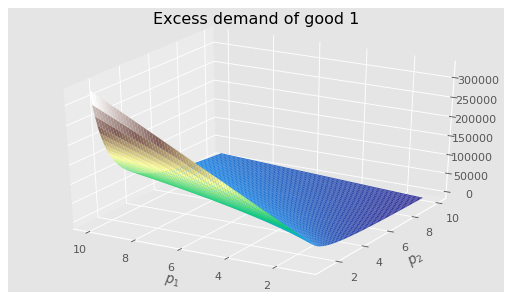

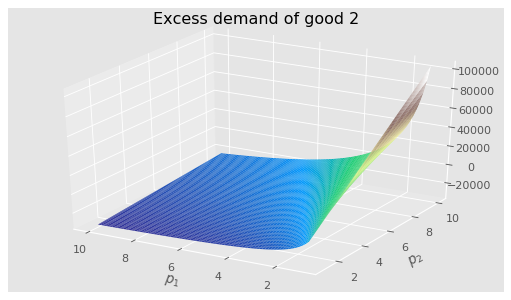

In [107]:
# Plotting the figures

# Figure for good 1
fig1 = plt.figure(dpi=80, figsize=(8,16))

axis1 = fig1.add_subplot(3,1,1, projection = '3d')
fig1 = axis1.plot_surface(p1_grid, p2_grid, grid1_empty, cmap=plt.cm.terrain, cstride=1, rstride=1)

# Defining title and labels
axis1.set_title('Excess demand of good 1')
axis1.set_xlabel('$p_1$')
axis1.set_ylabel('$p_2$')
axis1.invert_xaxis()

#Figure for good 2
fig2 = plt.figure(dpi=80, figsize=(8,16))

axis2 = fig2.add_subplot(3,1,1, projection = '3d')
fig2 = axis2.plot_surface(p1_grid, p2_grid, grid2_empty, cmap=plt.cm.terrain, cstride=1, rstride=1)

# Defining title and labels
axis2.set_title('Excess demand of good 2')
axis2.set_xlabel('$p_1$')
axis2.set_ylabel('$p_2$')
axis2.invert_xaxis()

We see, as expected, that the excess demand of good 1 is highly dependant on the price of good 1, and likewise with good 2.

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

As described, we will find the equilibrium by a trial-and-error method (tâtonnement).

In [108]:
# We set some parameter values
epsilon = 1e-8
kappa = 0.1
p1 = 3
p2 = 3

# Setting starting point and cap for iterations
t=0
cap = 25000

# Defining the iteration
while t < cap:
    Z1 = excess1_func(betas, p1, p2, e1, e2, e3)
    Z2 = excess2_func(betas, p1, p2, e1, e2, e3)
    
    if Z1 < epsilon and Z2 < epsilon:
        print()
        break
    else:
        p1 += kappa*Z1/N
        p2 += kappa*Z2/N
        
    # Setting up the print
    if (t%5 == 0 and t<=50) or t%2500 == 0 or t == 500 or t == 25000:
        print(f'Iteration {t} -> Excess good 1: {Z1:10.4f} - Excess good 2: {Z2:01.4f} -> p1: {p1:10.4f} - p2: {p2:10.4f}')
             
    t += 1

Iteration 0 -> Excess good 1: 24830.6208 - Excess good 2: -19681.1061 -> p1:     3.0497 - p2:     2.9606
Iteration 5 -> Excess good 1: 19962.4377 - Excess good 2: -17490.0649 -> p1:     3.2675 - p2:     2.7770
Iteration 10 -> Excess good 1: 16362.3056 - Excess good 2: -15373.7747 -> p1:     3.4447 - p2:     2.6149
Iteration 15 -> Excess good 1: 13599.7239 - Excess good 2: -13339.5522 -> p1:     3.5912 - p2:     2.4734
Iteration 20 -> Excess good 1: 11432.3113 - Excess good 2: -11406.8960 -> p1:     3.7138 - p2:     2.3517
Iteration 25 -> Excess good 1:  9709.4558 - Excess good 2: -9600.2502 -> p1:     3.8175 - p2:     2.2486
Iteration 30 -> Excess good 1:  8329.8788 - Excess good 2: -7943.2771 -> p1:     3.9060 - p2:     2.1627
Iteration 35 -> Excess good 1:  7220.9377 - Excess good 2: -6454.4097 -> p1:     3.9825 - p2:     2.0923
Iteration 40 -> Excess good 1:  6327.8340 - Excess good 2: -5144.0469 -> p1:     4.0492 - p2:     2.0358
Iteration 45 -> Excess good 1:  5607.7219 - Excess g

We see, that after around 12,500 iterations, the equilibrium prices has been found by trial and error.

The prices are (p1, p2, p3) = (6.49, 2.62, 1.00). These are having an excess demand of (Z1, Z2) = (0, 0)

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

In [109]:
# We define the utility function
def u_j(betas, gamma, p1, p2, e1, e2, e3):
    
    # Quantities of each good
    Q1 = demand_good1_func(betas, p1, p2, e1, e2, e3)
    Q2 = demand_good2_func(betas, p1, p2, e1, e2, e3)
    Q3 = demand_good3_func(betas, p1, p2, e1, e2, e3)
    
    # Defining the betas
    good1_beta = np.array([x[0] for x in betas])
    good2_beta = np.array([x[1] for x in betas])
    good3_beta = np.array([x[2] for x in betas])
    
    # Calculate the consumers utilities
    return ((Q1**good1_beta)*(Q2**good2_beta)*(Q3**good3_beta))**gamma
    

In [110]:
# We use the prices found in Question 3.3 and define u_j*
p1 = 6.4901
p2 = 2.6167
u_j_star = u_j(betas, gamma, p1, p2, e1, e2, e3)

Mean:     1.0101644016258116
Variance: 0.317340867953136


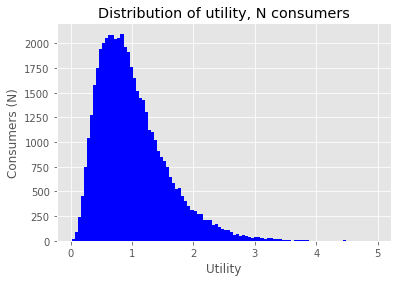

In [111]:
# Plot the histogram of the utility distribution
plt.style.use('ggplot')
plt.hist(u_j_star, bins = 100, color = 'b')
plt.title('Distribution of utility, N consumers')
plt.xlabel('Utility')
plt.ylabel('Consumers (N)')

# Print the mean and variance of the distribution
print("Mean:    " ,np.mean(u_j_star))
print("Variance:" ,np.var(u_j_star))

We see the utility distribution having a mean on 1.0, and a variance of 0.32.

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

We now want to draw a new random $e$, where $e = e_1 = e_2 = e_3$

The endowments are still exponentially distributed, yet they are distributed equally:


In [112]:
# We draw a new random e
np.random.seed(seed)
e = np.random.exponential(zeta,size=N)
e = e1 = e2 = e3

In [113]:
# We define the 3 demand functions

# Good 1
def demand_good1_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,0]*I/p1

# Good 2
def demand_good2_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,1]*I/p2

# Good 3
def demand_good3_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,2]*I

In [114]:
# Defining the excess demand functions

# Excess demand function 1
def excess1_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_1 = np.sum(demand_good1_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_1 = np.sum(e1)
    
    # excess demand
    excess_demand_1 = demand_1 - supply_1
    
    return excess_demand_1

# Excess demand function 2
def excess2_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_2 = np.sum(demand_good2_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_2 = np.sum(e2)
    
    # excess demand
    excess_demand_2 = demand_2 - supply_2
    
    return excess_demand_2

# Excess demand function 3
def excess3_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_3 = np.sum(demand_good3_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_3 = np.sum(e1)
    
    # excess demand
    excess_demand_3 = demand_3 - supply_3
    
    return excess_demand_3


In [115]:
# We set some parameter values
epsilon = 1e-8
kappa = 0.1
p1 = 3
p2 = 3

# Setting starting point and cap for iterations
t=0
cap = 25000

# Defining the iteration
while t < cap:
    Z1 = excess1_func(betas, p1, p2, e1, e2, e3)
    Z2 = excess2_func(betas, p1, p2, e1, e2, e3)
    
    if Z1 < epsilon and Z2 < epsilon:
        print()
        p1target = p1
        p2target = p2
        break
    else:
        p1 += kappa*Z1/N
        p2 += kappa*Z2/N
        
    # Setting up the print
    if (t%50 == 0 and t<=500) or t%2500 == 0 or t == 500 or t == 25000:
        print(f'Iteration {t} -> Excess good 1: {Z1:10.4f} - Excess good 2: {Z2:01.4f} -> p1: {p1:10.4f} - p2: {p2:10.4f}')
             
    t += 1

Iteration 0 -> Excess good 1: 24930.5698 - Excess good 2: -19901.9399 -> p1:     3.0499 - p2:     2.9602
Iteration 50 -> Excess good 1:  4947.2756 - Excess good 2: -3036.5920 -> p1:     4.1561 - p2:     1.9498
Iteration 100 -> Excess good 1:  2693.5447 - Excess good 2: 539.5135 -> p1:     4.5027 - p2:     1.8925
Iteration 150 -> Excess good 1:  2133.3960 - Excess good 2: 754.0416 -> p1:     4.7399 - p2:     1.9638
Iteration 200 -> Excess good 1:  1800.0273 - Excess good 2: 669.3284 -> p1:     4.9353 - p2:     2.0353
Iteration 250 -> Excess good 1:  1544.7666 - Excess good 2: 577.7165 -> p1:     5.1018 - p2:     2.0974
Iteration 300 -> Excess good 1:  1338.4672 - Excess good 2: 500.7760 -> p1:     5.2454 - p2:     2.1512
Iteration 350 -> Excess good 1:  1168.0785 - Excess good 2: 436.9326 -> p1:     5.3703 - p2:     2.1979
Iteration 400 -> Excess good 1:  1025.2876 - Excess good 2: 383.4218 -> p1:     5.4797 - p2:     2.2388
Iteration 450 -> Excess good 1:   904.2497 - Excess good 2: 33

In [116]:
def u_j2(betas, gamma, p1, p2, e1, e2, e3):
    
    # We use the calculated quantities to determine the consumers' utilities.
    Q1 = demand_good1_func(betas, p1, p2, e1, e2, e3)
    Q2 = demand_good2_func(betas, p1, p2, e1, e2, e3)
    Q3 = demand_good3_func(betas, p1, p2, e1, e2, e3)
    
    # Betas
    good1_beta = np.array([x[0] for x in betas])
    good2_beta = np.array([x[1] for x in betas])
    good3_beta = np.array([x[2] for x in betas])
    
    # Calculation of consumers' utilities.
    return ((Q1**good1_beta)*(Q2**good2_beta)*(Q3**good3_beta))**gamma
    

In [119]:
# Define the new u with the new values for the prices
p1 = 6.4166
p2 = 2.5888
u_j_new = u_j2(betas, gamma, p1, p2, e1, e2, e3)

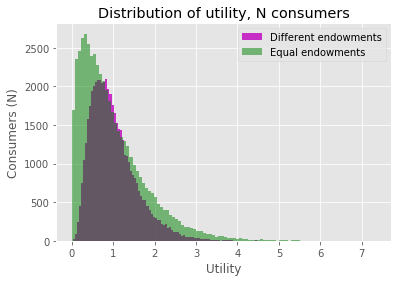

In [125]:
# We plot the new values in a histogram
plt.hist(u_j_star, bins = 100, alpha = 0.8, label = 'Different endowments', color = 'm')
plt.hist(u_j_new, bins = 100, alpha = 0.5, label = 'Equal endowments', color = 'g')
plt.style.use('ggplot')
plt.title('Distribution of utility, N consumers')
plt.xlabel('Utility')
plt.ylabel('Consumers (N)')
plt.legend()
plt.show()

bla bla bla

Skriv noget om gamma :/